# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [48]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df = pd.read_csv('/content/drive/My Drive/data/data_winequality-red.csv.gz', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


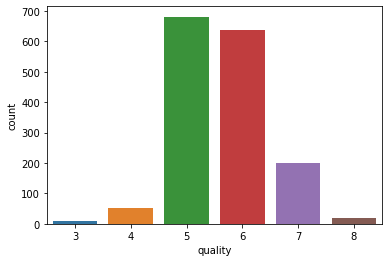

In [52]:
sns.countplot('quality', data=df)

In [53]:
X = df.drop(['quality'], axis=1)
y = df['quality']

Из рисунка видно, что целевой признак распределен не равномерно.

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [55]:
clf_kn_10 = KNeighborsClassifier(n_neighbors = 10)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_kn_10, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.49971590909090907  std =  0.02357372600696035


In [56]:
clf_kn_10_sc = KNeighborsClassifier(n_neighbors = 10)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scores = cross_val_score(clf_kn_10_sc, scaled_X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.5835325235109717  std =  0.03472681703295673


In [57]:
clf_ridge = RidgeClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_ridge, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.5866281347962382  std =  0.030363263050429


In [58]:
clf_dt = DecisionTreeClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_dt, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.6103996865203761  std =  0.03776940568607044


In [59]:
clf_bc = BaggingClassifier(n_estimators=100)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_bc, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.6823334639498432  std =  0.031137623092012755


In [60]:
clf_bc_h = BaggingClassifier(n_estimators=100, max_features=X.shape[1] // 2 + 1)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_bc_h, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.6760638714733542  std =  0.021016580763923414


In [61]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=73)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_rf, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.688569749216301  std =  0.016110145845224123


### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

1. Почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без?

Потому что KNeighborsClassifier использует метрику расстояния между объектами. Так как в наборе данных много признаков, поэтому трудно подобрать подходящие веса, а также определить, какие признаки не важны для задачи МО.

2. Почему масштабирование не важно для деревьев решений?

Потому что построение деревьев ведется по каким то эмпирически или интуитивно понятным правилам. И деревья как правило представляют большую конструкцию из if - else. То есть построение дерева решений зависит от условия, и не использует метрики расстояния, а использует метрику энтропии.

3. Почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)

Потому что, Бэггинг эффективен на малых выборках, когда исключение казалось бы малой части обучающих объектов приводит к построению существенно различных базовых моделей. В случае больших выборок обычно генерируют подвыборки существенно меньшей длины.

4. У какой модели наибольшее отклонение от среднего качества предсказаний? А почему??

У DecisonTreeClassifier так как деревья очень чувствительны к шумам во входных данных, вся модель может кардинально измениться, если немного изменится обучающая выборка. Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперплоскостей, перпендикулярных какой-то из координатной оси). Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений.
У KNeighborsClassifier так как из за малого числа соседей метод чувствителен к выбросам, то есть склонен переобучаться.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [62]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


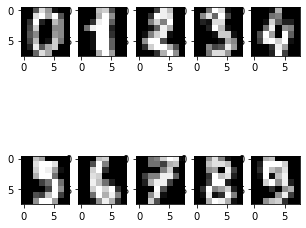

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(5, 5))
for i in range(10):
    img = X[y==i][0].reshape(8,8)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [64]:
clf_dt_mnist = DecisionTreeClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_dt_mnist, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.8414004952027236  std =  0.012206012597784416


In [65]:
clf_bc_mnist = BaggingClassifier(n_estimators=100)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_bc_mnist, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.9532621479418136  std =  0.009011286499566635


In [68]:
clf_bc_mf_sqrt_mnist = BaggingClassifier(n_estimators = 100, max_features = int(np.sqrt(X.shape[1]))) 

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_bc_mf_sqrt_mnist, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.9621556793562365  std =  0.009591632027158943


In [72]:
from sklearn.datasets import make_classification

X_mc, y_mc = make_classification(n_samples=100, n_features=int(np.sqrt(X.shape[1])))

In [76]:
clf_bc_mf_sqrt_mnist_h = BaggingClassifier() 

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_bc_mf_sqrt_mnist_h, X_mc, y_mc, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.93  std =  0.024494897427831747


In [77]:
clf_rf_mnist = RandomForestClassifier(n_estimators=100, random_state=73)

kf = KFold(n_splits=5, shuffle=True, random_state = 73)

scores = cross_val_score(clf_rf_mnist, X, y, scoring='accuracy', cv=kf, n_jobs = -1)
print('mean = ', scores.mean(), ' std = ', np.std(scores))

mean =  0.9755168678427732  std =  0.004079457863262931


### 2.3 В чём разница? (3 балла)

Ответье на вопрос: Так как признаков становится меньше, поэтому деревья становятся менее коррелированы. А мы их здесь ограничиваем.

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

p =  1  mean =  0.7902172563625077  std =  0.033271424534275854
p =  5  mean =  0.9204252017380508  std =  0.018926571813085245
p =  10  mean =  0.9449162011173184  std =  0.012254529174297516
p =  15  mean =  0.9666263190564865  std =  0.010212106020736487
p =  50  mean =  0.9721880819366853  std =  0.008938972613002178
p =  100  mean =  0.9710738671632526  std =  0.008876691276272546
p =  150  mean =  0.9738516449410304  std =  0.009648779016497477
p =  200  mean =  0.9766356300434513  std =  0.007356397307108587
p =  300  mean =  0.9755214152700186  std =  0.008683435406523644


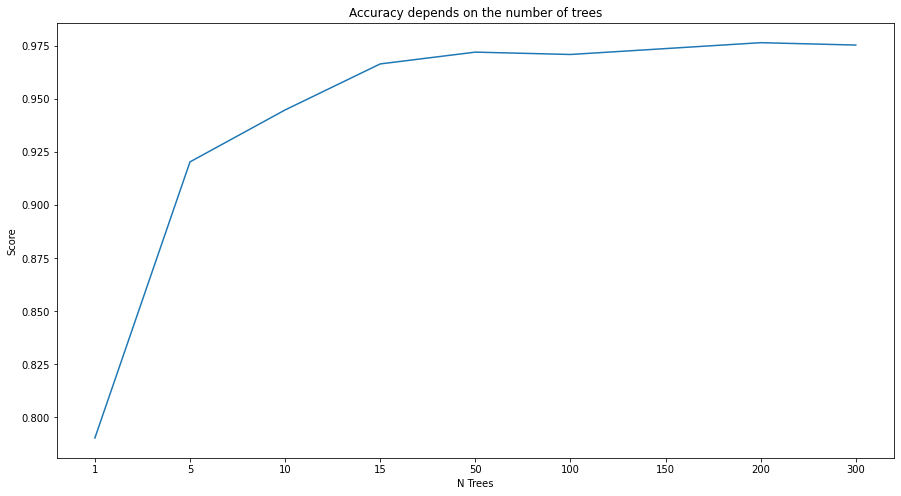

In [82]:
n_trees = str('1,5,10,15,50,100,150,200,300').split(',')

resultScores = []

for i in range(len(n_trees)):
  clf = RandomForestClassifier(n_estimators = int(n_trees[i]))
  cv = KFold(n_splits=10, shuffle=True, random_state = 73)
  scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs = -1)
  resultScores.append(scores.mean())
  print('p = ', int(n_trees[i]), ' mean = ', scores.mean(), ' std = ', np.std(scores))

plt.figure(figsize=(15, 8))
plt.plot(n_trees, resultScores)
plt.xlabel("N Trees")
plt.ylabel("Score")
plt.title("Accuracy depends on the number of trees")
plt.show()

Исходя из полученных данных: вывод средней точности, график зависимости точности от количества деревьев, самое хорошее качества получается при количестве деревьев равным числу принадлежащему промежутку [50, 200], далее при увеличении кол - ва деревьев качество идет на спад.

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

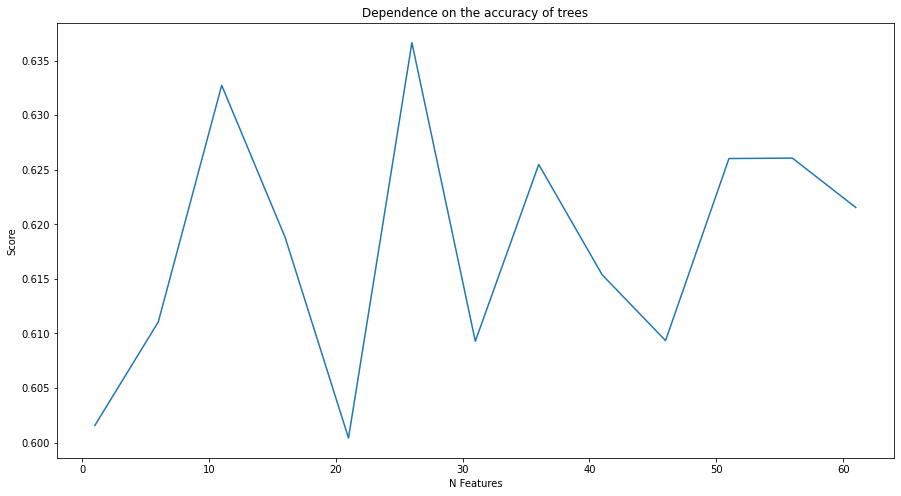

In [86]:
n_features = np.arange(1, 64, 5)
resultScores = []
for i in n_features:
  clf = RandomForestClassifier(n_estimators=100, max_features=int(i), max_samples=5)
  cv = KFold(n_splits=10, shuffle=True, random_state = 73)
  scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs = -1)
  resultScores.append(scores.mean())
    
plt.figure(figsize=(15, 8))
plt.plot(n_features, resultScores)
plt.xlabel("N Features")
plt.ylabel("Score")
plt.title("Dependence on the accuracy of trees")
plt.show()

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

1. Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?

Проблема случайного леса в том, что каждое дерево сильно переобучается. Когда деревья компонируют, качество их обучения принимает константное значение, что можно заключить из рисунка выше. 

2. Как зависит качество предсказания в дереве в зависимости от max_features?

Если для обучения модели будет отобрано слишком маленькое количество признаков, модель не сможет установить зависимости между признаками (говорят, не поймает зависимостей). А если количество признаков будет слишком большим то во первых возможно, что некоторые из них будут коррелировать между ними, и необходимо будет анализировать зависимости между ними (мультиколлинеарность), и для этого применяется регуляризаторы, а для поиска например можно использовать коэффициент инфляции дисперсии (VIF).

3. Почему качество зависит от max_features?

Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (так как деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает композиция деревьев. При увеличении max_features увеличивается время построения леса, а деревья становятся «более однообразными»

4. Как глубина деревьев влияет на качество случайного леса?

Ясно, что чем меньше глубина, тем быстрее строится и работает RF. При увеличении глубины резко возрастает качество на обучении, но и на контроле оно, как правило, увеличивается. Рекомендуется использовать максимальную глубину (кроме случаев, когда объектов слишком много и получаются очень глубокие деревья, построение которых занимает значительное время). При использовании неглубоких деревьев изменение параметров, связанных с ограничением числа объектов в листе и для деления, не приводит к значимому эффекту (листья и так получаются «большими»). Неглубокие деревья рекомендуют использовать в задачах с большим числом шумовых объектов (выбросов).

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)